About the dataset:<br />
This dataset is from a [Census Bureau Database](http://www.census.gov/ftp/pub/DES/www/welcome.html), The dataset classifies Person whether the annual income of person is above $50000 Dollar or less than $50000.<br />
Feature Info:
1. __age__ : Age of the Person (continuous).
2. __workclass__ : Working Sector of Person (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
3. __fnlwgt__ : continuous.
4. __education__ : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. __education-num__ : continuous.
6. __marital-status__ : Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. __occupation__ : Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. __relationship__ : Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. __race__ : White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. __sex__ : Female, Male.
11. __capital-gain__ : continuous.
12. __capital-loss__ : continuous.
13. __hours-per-week__ : continuous.
14. __native-country__ : Native Country of Person (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands).

Description of __fnlwgt__ (final weight)<br />
The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US.  These are prepared monthly
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls.
These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through
them 6 times so that by the end we come back to all the controls we used.<br />
The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the population.<br />
People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. <br />
That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)

In [ ]:
dataset_1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
dataset_2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
data_1 = pd.read_csv(dataset_1, header = None, sep = ', ')
data_2 = pd.read_csv(dataset_2, skiprows = 1, header = None, sep = ', ')

In [107]:
data_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
data_1.shape, data_2.shape

((32561, 15), (16281, 15))

Joining the both `train` and `test` data to perform analysis

In [108]:
columns_names = [
    'age', 'workclass', 'fnlwgt', 'education', 
    'education_num', 'marital_status', 'occupation', 
    'relationship', 'race', 'sex', 'capital_gain', 
    'capital_loss', 'hours_per_week', 'native_country', 'income'
    ]
# concating both data
data = pd.concat((data_1, data_2), ignore_index=True)
data.columns = columns_names
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
data.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In the tail part, Here the missing values are marked as `'?'`, Handling those in data cleaning

Missing Values

In [79]:
# As we see in the above part the missing values in the dataset are in the form of `?`
data.replace({'(\?)':np.NaN}, regex = True, inplace = True)

In [82]:
# checking Null Values
missing = data.isna().sum()
missing

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

The dataset is have some missing values

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

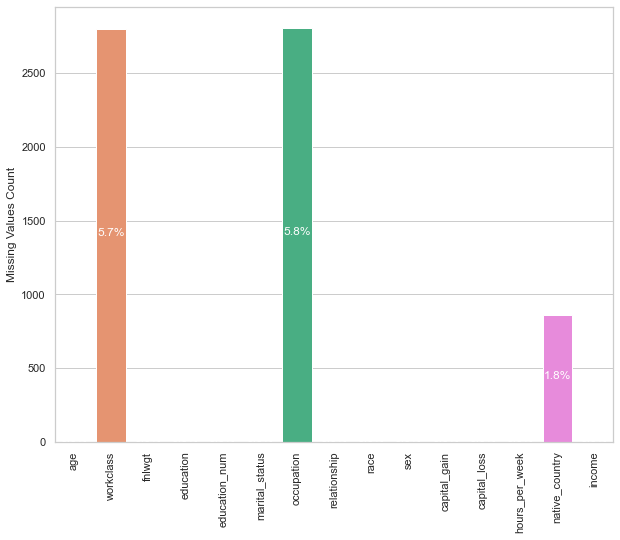

In [88]:

# selecting only columns with missing values more than 0
# missing = missing_count[missing_count > 0]
# percentage of missing values
missing_prcnt = (missing/data.shape[0]) * 100
sns.set(rc = {'figure.figsize': (10, 8)})
sns.set_style(style = 'whitegrid')

ax = sns.barplot(x = missing.index, y = missing.values)
plt.ylabel('Missing Values Count')

# labeling the all bar with missing number of percentage
for i in range(missing.shape[0]):
    x, y = i, missing[i]/2
    s = str(round(missing_prcnt[i], 1)) + '%'
    ax.text(x, y, s, color = 'white', ha = 'center')

plt.xticks(rotation = 90)
plt.show()

Columns `workclass, occupation, native_country` have some missing values

To fill these missings values first we have to find how a person's workclass, education, occupation are related with each other.

In [111]:
data.select_dtypes('object').describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


So most of the person are have a Private workclass and their highest education is HS-grad

In [113]:
# checking for duplicated rows

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

As there are only 35 duplicated rows and our total rows are 30,000 so I drop these 35 rows.

In [ ]:
data.drop(index = data[data.duplicated()].index, inplace = True)

In [36]:
# Selecting Categorical and Numerical Columns

# categorical columns
cats_cols = [
    'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 
    'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
    ]
# nums_cols = [
#     'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
#     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT1', 'BILL_AMT1', 
#     'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1', 'BILL_AMT1'
#     ]

In [39]:
data[cats_cols]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,,,,
1,2,2,1,2,2,-1,-1,-2,-2
2,2,2,2,-1,2,0,0,0,2
3,2,2,2,0,0,0,0,0,0
4,2,2,1,0,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
29996,1,3,1,0,0,0,0,0,0
29997,1,3,2,-1,-1,-1,-1,0,0
29998,1,2,2,4,3,2,-1,0,0


In [47]:
data.loc[:, cats_cols]

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,,,,
1,2,2,1,2,2,-1,-1,-2,-2
2,2,2,2,-1,2,0,0,0,2
3,2,2,2,0,0,0,0,0,0
4,2,2,1,0,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
29996,1,3,1,0,0,0,0,0,0
29997,1,3,2,-1,-1,-1,-1,0,0
29998,1,2,2,4,3,2,-1,0,0


In [48]:
data.select_dtypes(exclude = cats_cols)

TypeError: data type 'SEX' not understood